In [2]:
from Adversary import Adversary, Problem, to_str
import numpy as np
import itertools
from Examples import exact_k
from ElementDistinctness import ED
from Solvers import adv_solver
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] =1000
from copy import deepcopy as copy

In [4]:
def compose(prob, prob_list):
    assert len(prob.alphabet) == 2
    assert prob.n == len(prob_list)
    comp_families = [set(), set()]
    prob_families = [prob.no_instances, prob.yes_instances]
    for j in range(2):
        for prob_inst in prob_families[j]:
            for instances in itertools.product(*[prob_list[i].no_instances if prob_inst[i]==0 else prob_list[i].yes_instances for i in range(prob.n)]):
                concat = []
                for instance in instances:
                    concat += instance
            # print(comp_families)
                comp_families[j].add(to_str(concat))
    return Problem(list(comp_families[0]), list(comp_families[1]))

In [3]:
list(itertools.product(*[[0,1], [2,3]]))

[(0, 2), (0, 3), (1, 2), (1, 3)]

In [26]:
n = 3
prob = compose(exact_k(n,2), [ED(n)]*n)
print()

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]
No:['012012', '012021', '012102', '012120', '012201', '012210', '021012', '021021', '021102', '021120', '021201', '021210', '102012', '102021', '102102', '102120', '102201', '102210', '120012', '120021', '120102', '120120', '120201', '120210', '201012', '201021', '201102', '201120', '201201', '201210', '210012', '210021', '210102', '210120', '210201', '210210']
Yes:['001001', '001002', '001010', '001011', '001020', '001022', '001100', '001101', '001110', '001112', '001121', '001122', '001200', '001202', '001211', '001212', '001220', '001221', '002001', '002002', '002010', '002011', '002020', '002022', '002100', '002101', '002110', '002112', '002121', '002122', '002200', '002202', '002211', '002212', '002220', '002221', '010001', '010002', '010010', '010011', '010020', '010022', '010100', '010101', '010110', '010112', '010121', '010122', '010200', '010202', '010211', '010212', '010220', '010221', '011001', '011002', '011

In [27]:
adv = adv_solver(prob)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jun 26 11:10:06 AM: Your problem has 129960 variables, 9 constraints, and 0 parameters.
(CVXPY) Jun 26 11:10:06 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 26 11:10:06 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 26 11:10:06 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 26 11:10:06 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Jun 26 11:10:06 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr ->

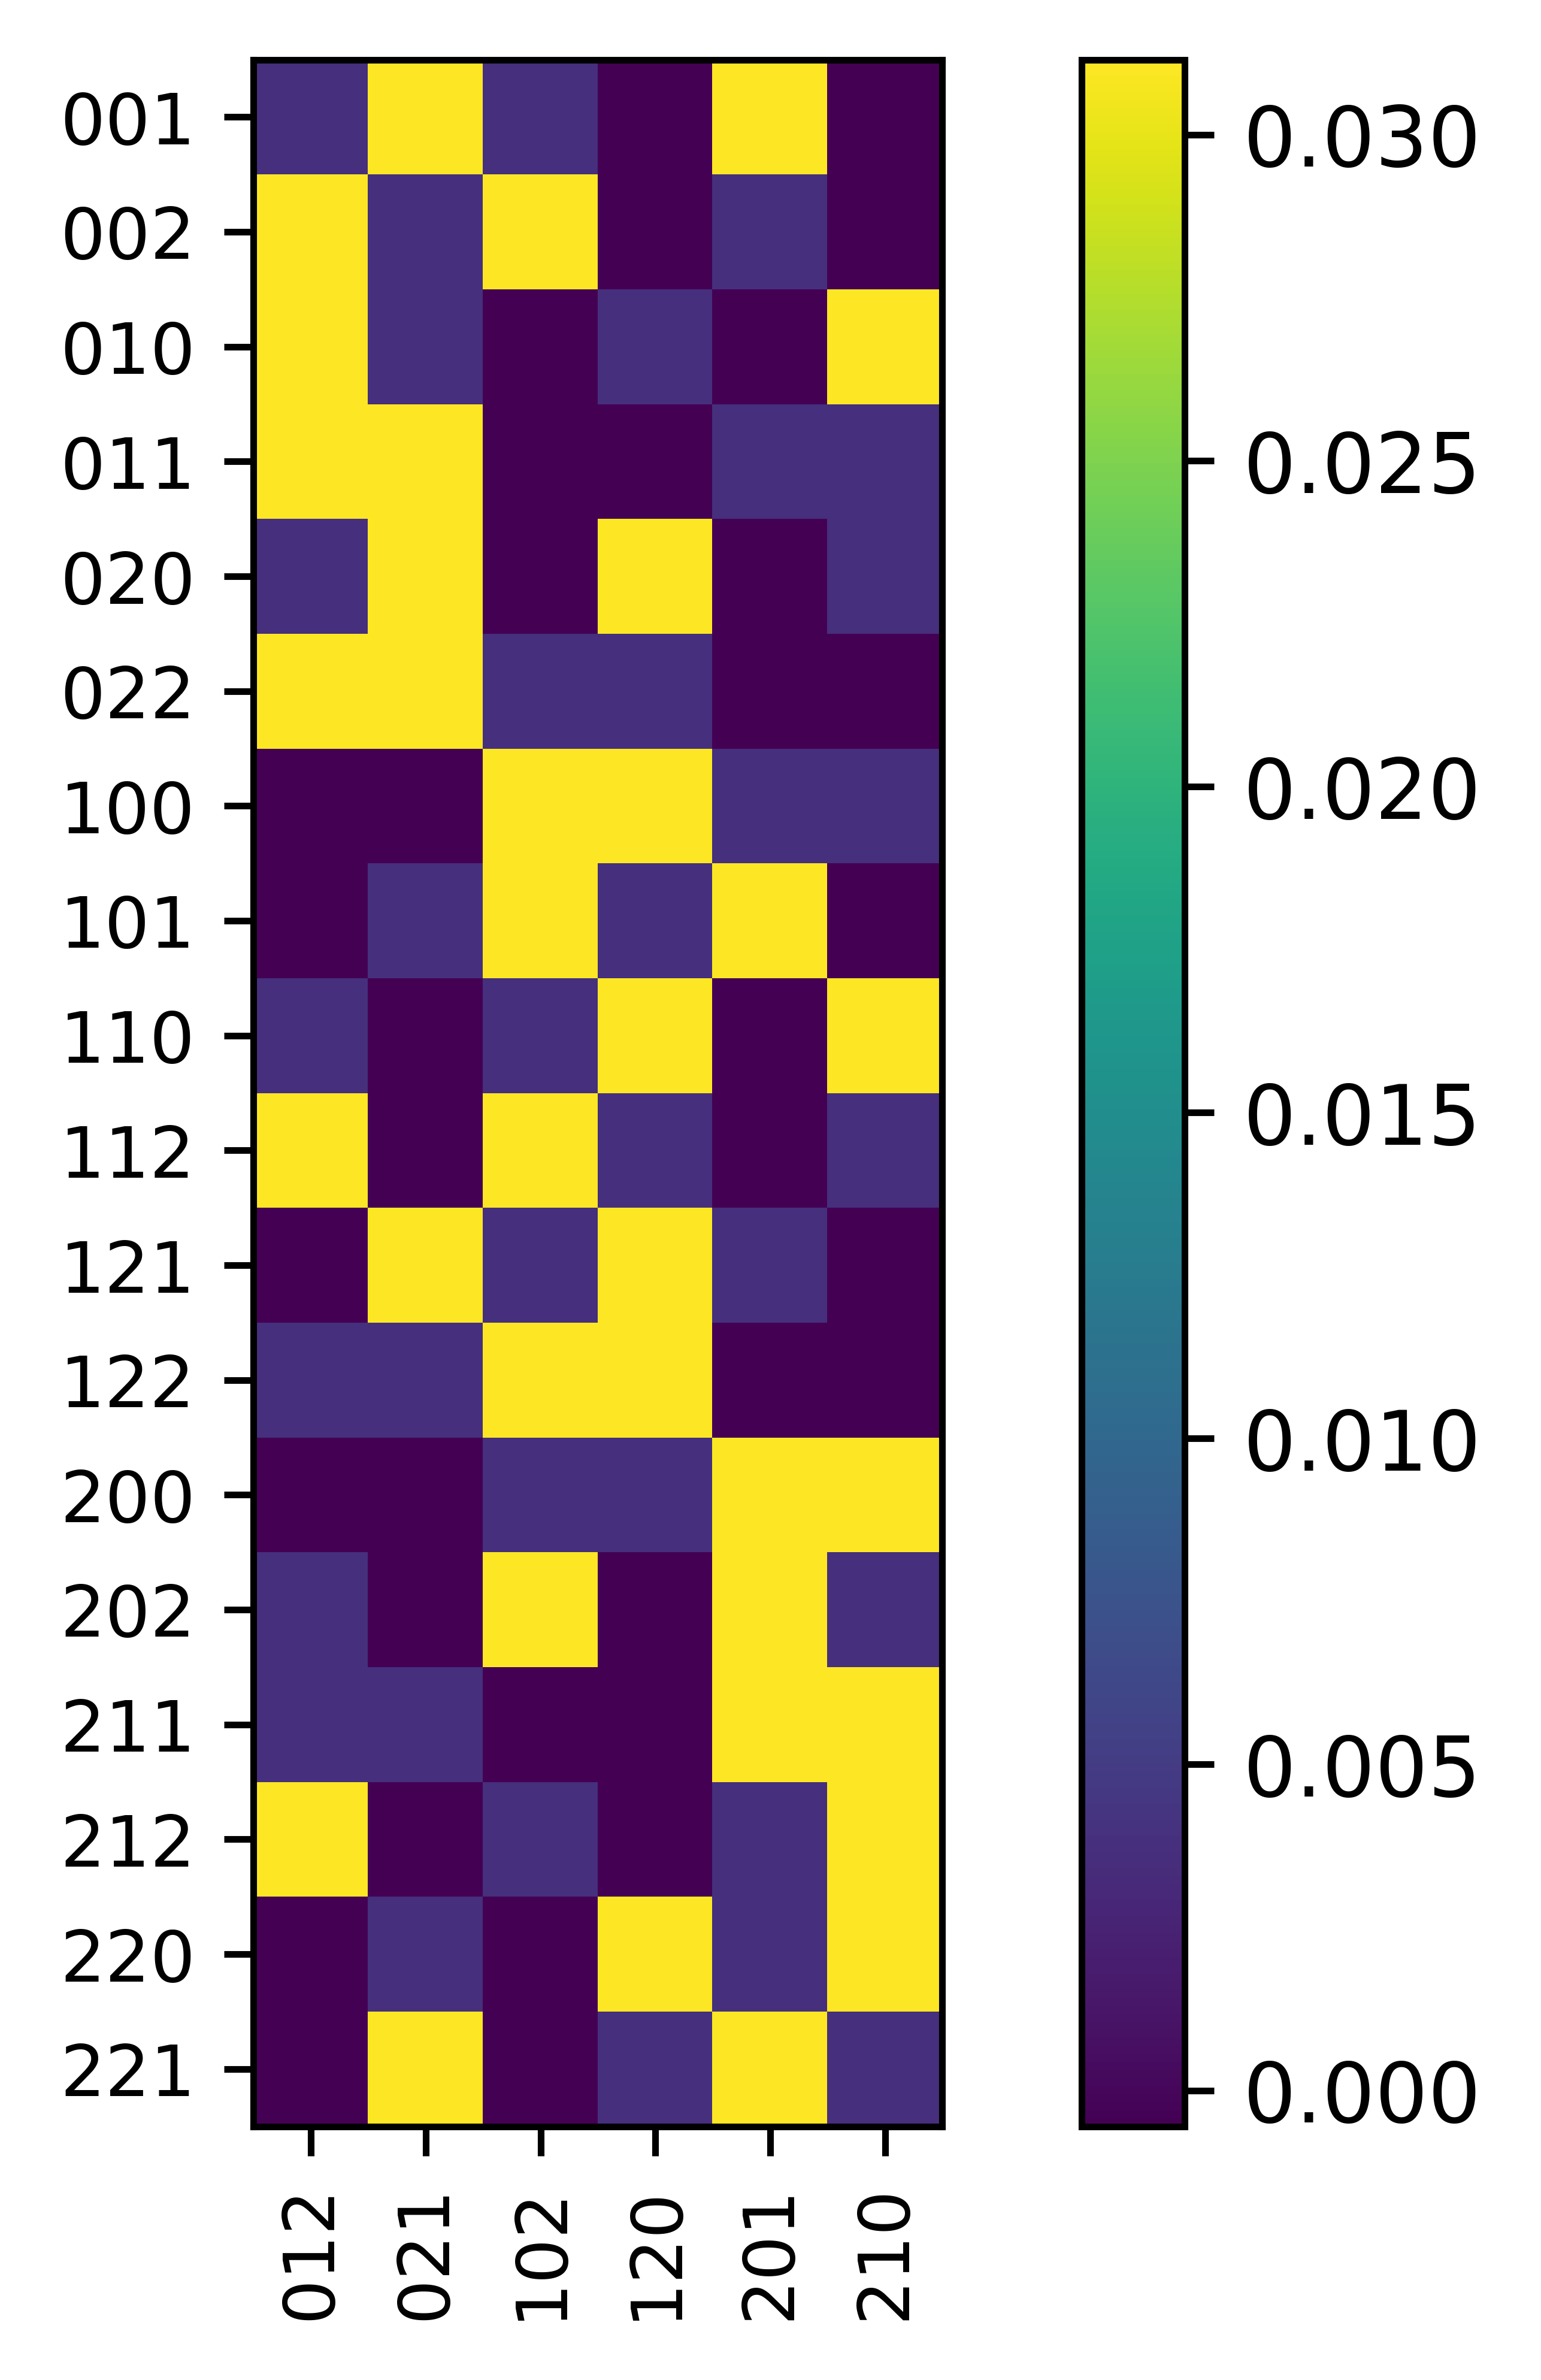

In [20]:
adv.visualize_matrix(save='ED3.png')

In [8]:
def special_or_ed(n, k):
    n_list = list(range(n))
    permutations = list(itertools.permutations(n_list))
    no_fam = list(itertools.product(*([permutations]*k)))
    yes_fam = set()
    # print('fam', no_fam)
    for no in no_fam:
        no = [list(n_) for n_ in no]
        for perm1_index in range(k):
            for perm2_index in range(perm1_index):
                for swap1_index in range(n):
                    for swap2_index in range(n):
                        perm1 = list(no[perm1_index])
                        perm2 = list(no[perm2_index])
                        curr1 = perm1[swap1_index]
                        curr2 = perm2[swap2_index]
                        if curr1 != curr2:
                            perm1[swap1_index] = curr2
                            perm2[swap2_index] = curr1
                            yes = copy(no)
                            yes[perm1_index] = perm1
                            yes[perm2_index] = perm2
                            yes_fam.add(tuple(tuple(y) for y in yes))
        
    yes_fam = list(yes_fam)
    
    no_fam = [to_str([to_str(n) for n in no]) for no in no_fam]
    yes_fam = [to_str([to_str(y) for y in yes]) for yes in yes_fam]
    no_fam.sort()
    yes_fam.sort()
    return Problem(no_fam, yes_fam)
    


In [9]:
n=3
prob = compose(exact_k(n, 2), [ED(n)]*n)
prob_special = special_or_ed(n, n)
print(prob.no_len, prob_special.no_len)
print(prob.yes_len, prob_special.yes_len)

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]
216 216
5832 972


In [30]:
special_ed_adv = adv_solver(prob_special, {'solver': 'MOSEK', 'verbose': True})

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jun 26 11:12:43 AM: Your problem has 8190 variables, 9 constraints, and 0 parameters.
(CVXPY) Jun 26 11:12:43 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 26 11:12:43 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 26 11:12:43 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 26 11:12:43 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Jun 26 11:12:43 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> C

In [47]:
print(special_ed_adv.matrix.shape)
reduced_mat = np.zeros(special_ed_adv.matrix.shape)
for i in range(prob_special.yes_len):
    yes = prob_special.yes_instances[i]
    j = prob.yes_instance_to_index[yes]
    reduced_mat[i, :] = adv.matrix[j, :]


(54, 36)


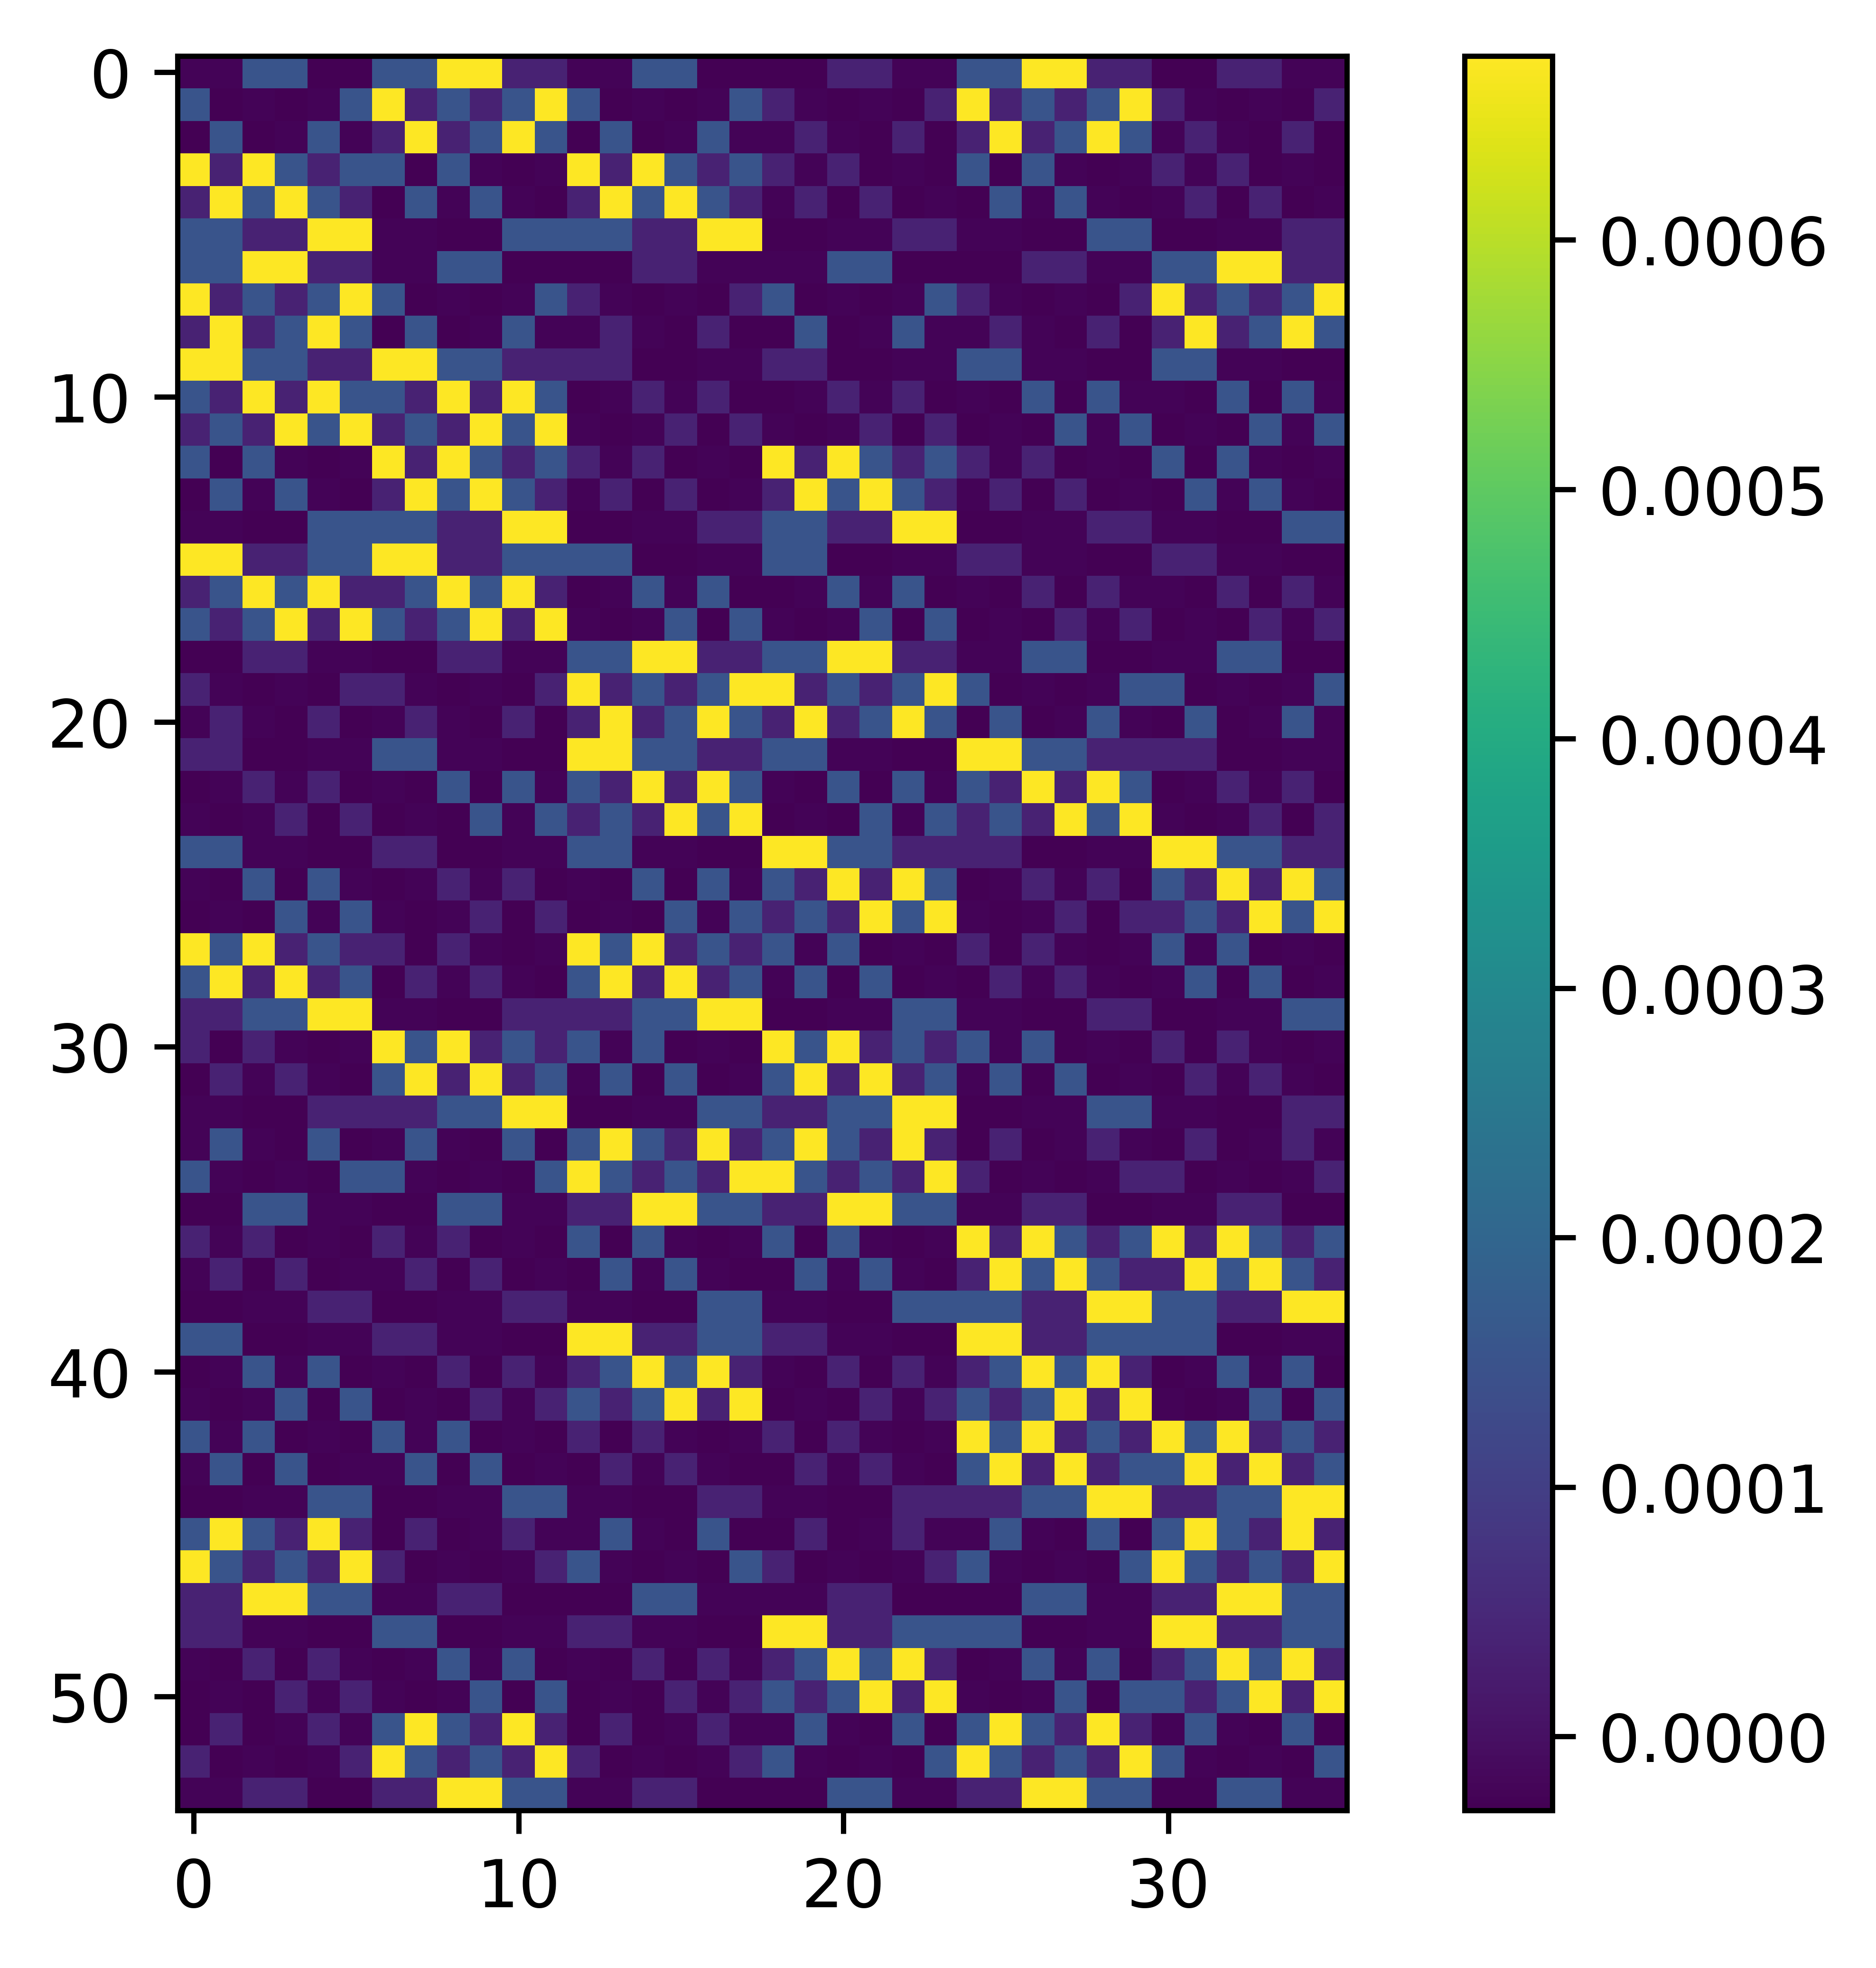

In [50]:
plt.imshow(reduced_mat)
plt.colorbar()
plt.savefig('reduced_ham2ed3')

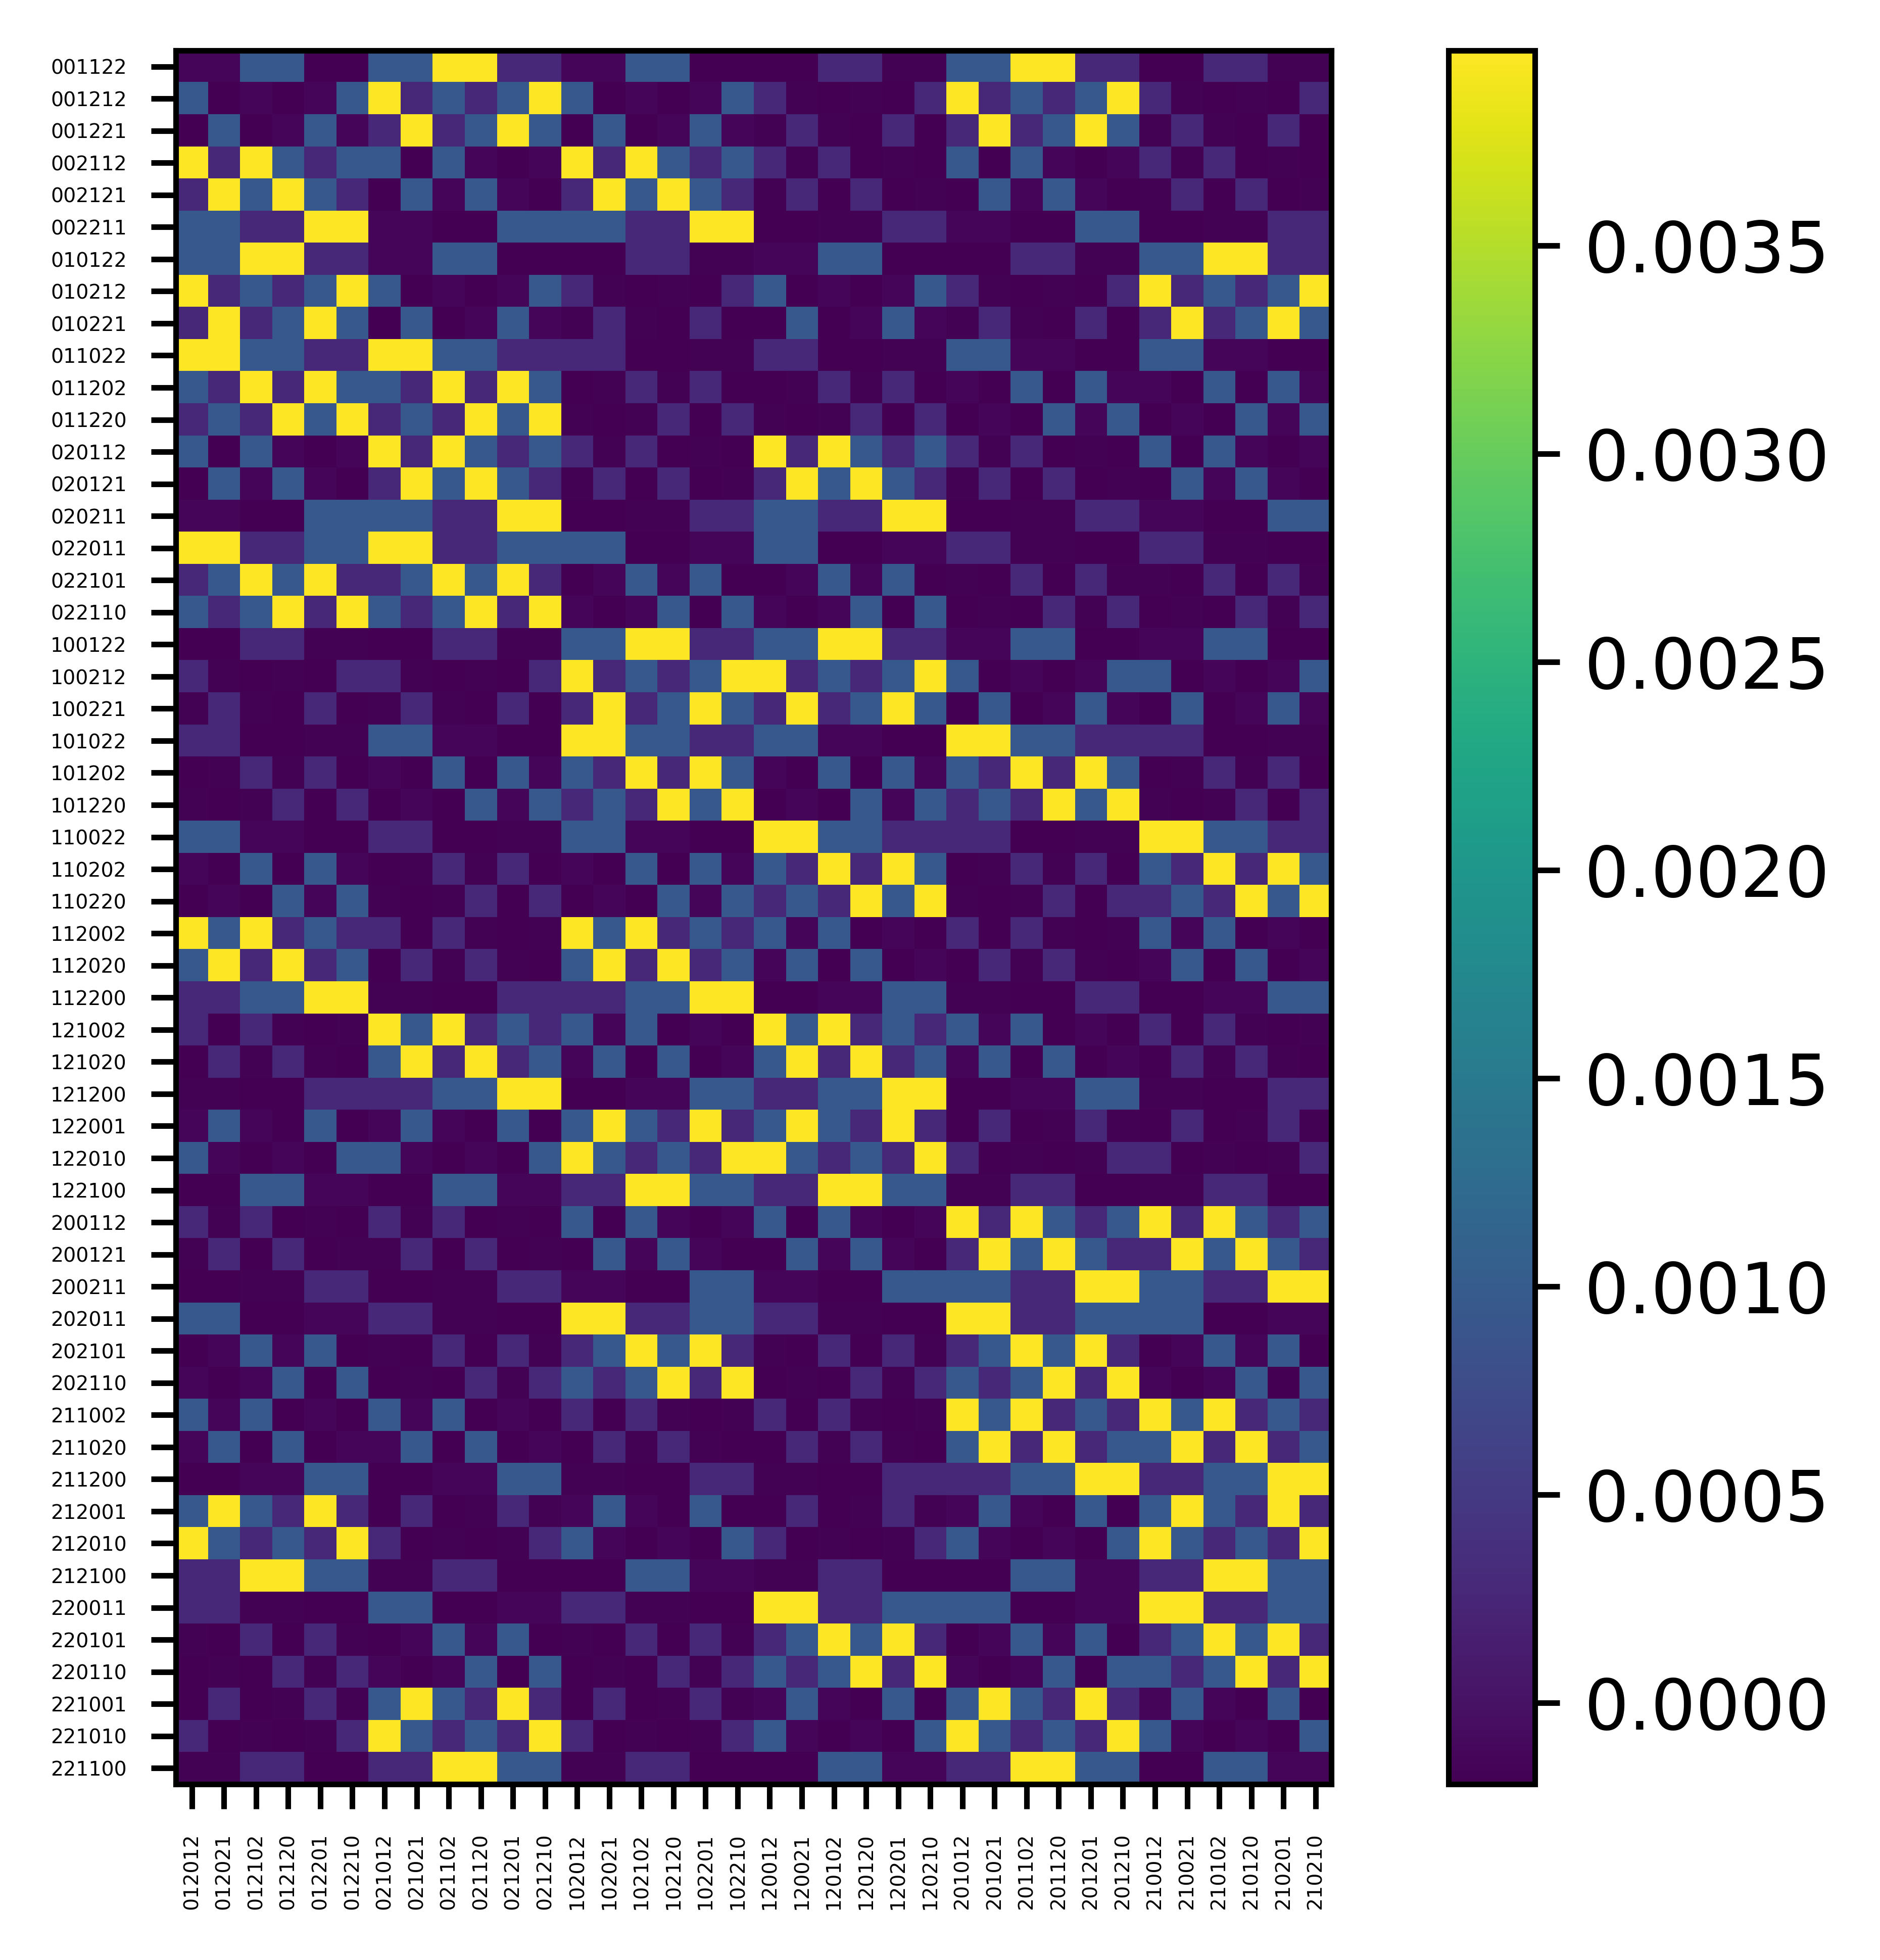

In [31]:
special_ed_adv.visualize_matrix(save='special32.png')

In [51]:
print(np.max(adv.matrix))

0.0006737209877228658


In [65]:
print(reduced_mat[0, 8])
print(special_ed_adv.matrix[0,8])

0.0006737207528606556
0.003969068727342271


In [67]:
c = special_ed_adv.matrix[0,8] / reduced_mat[0,8]
print(c)

5.891266834945169


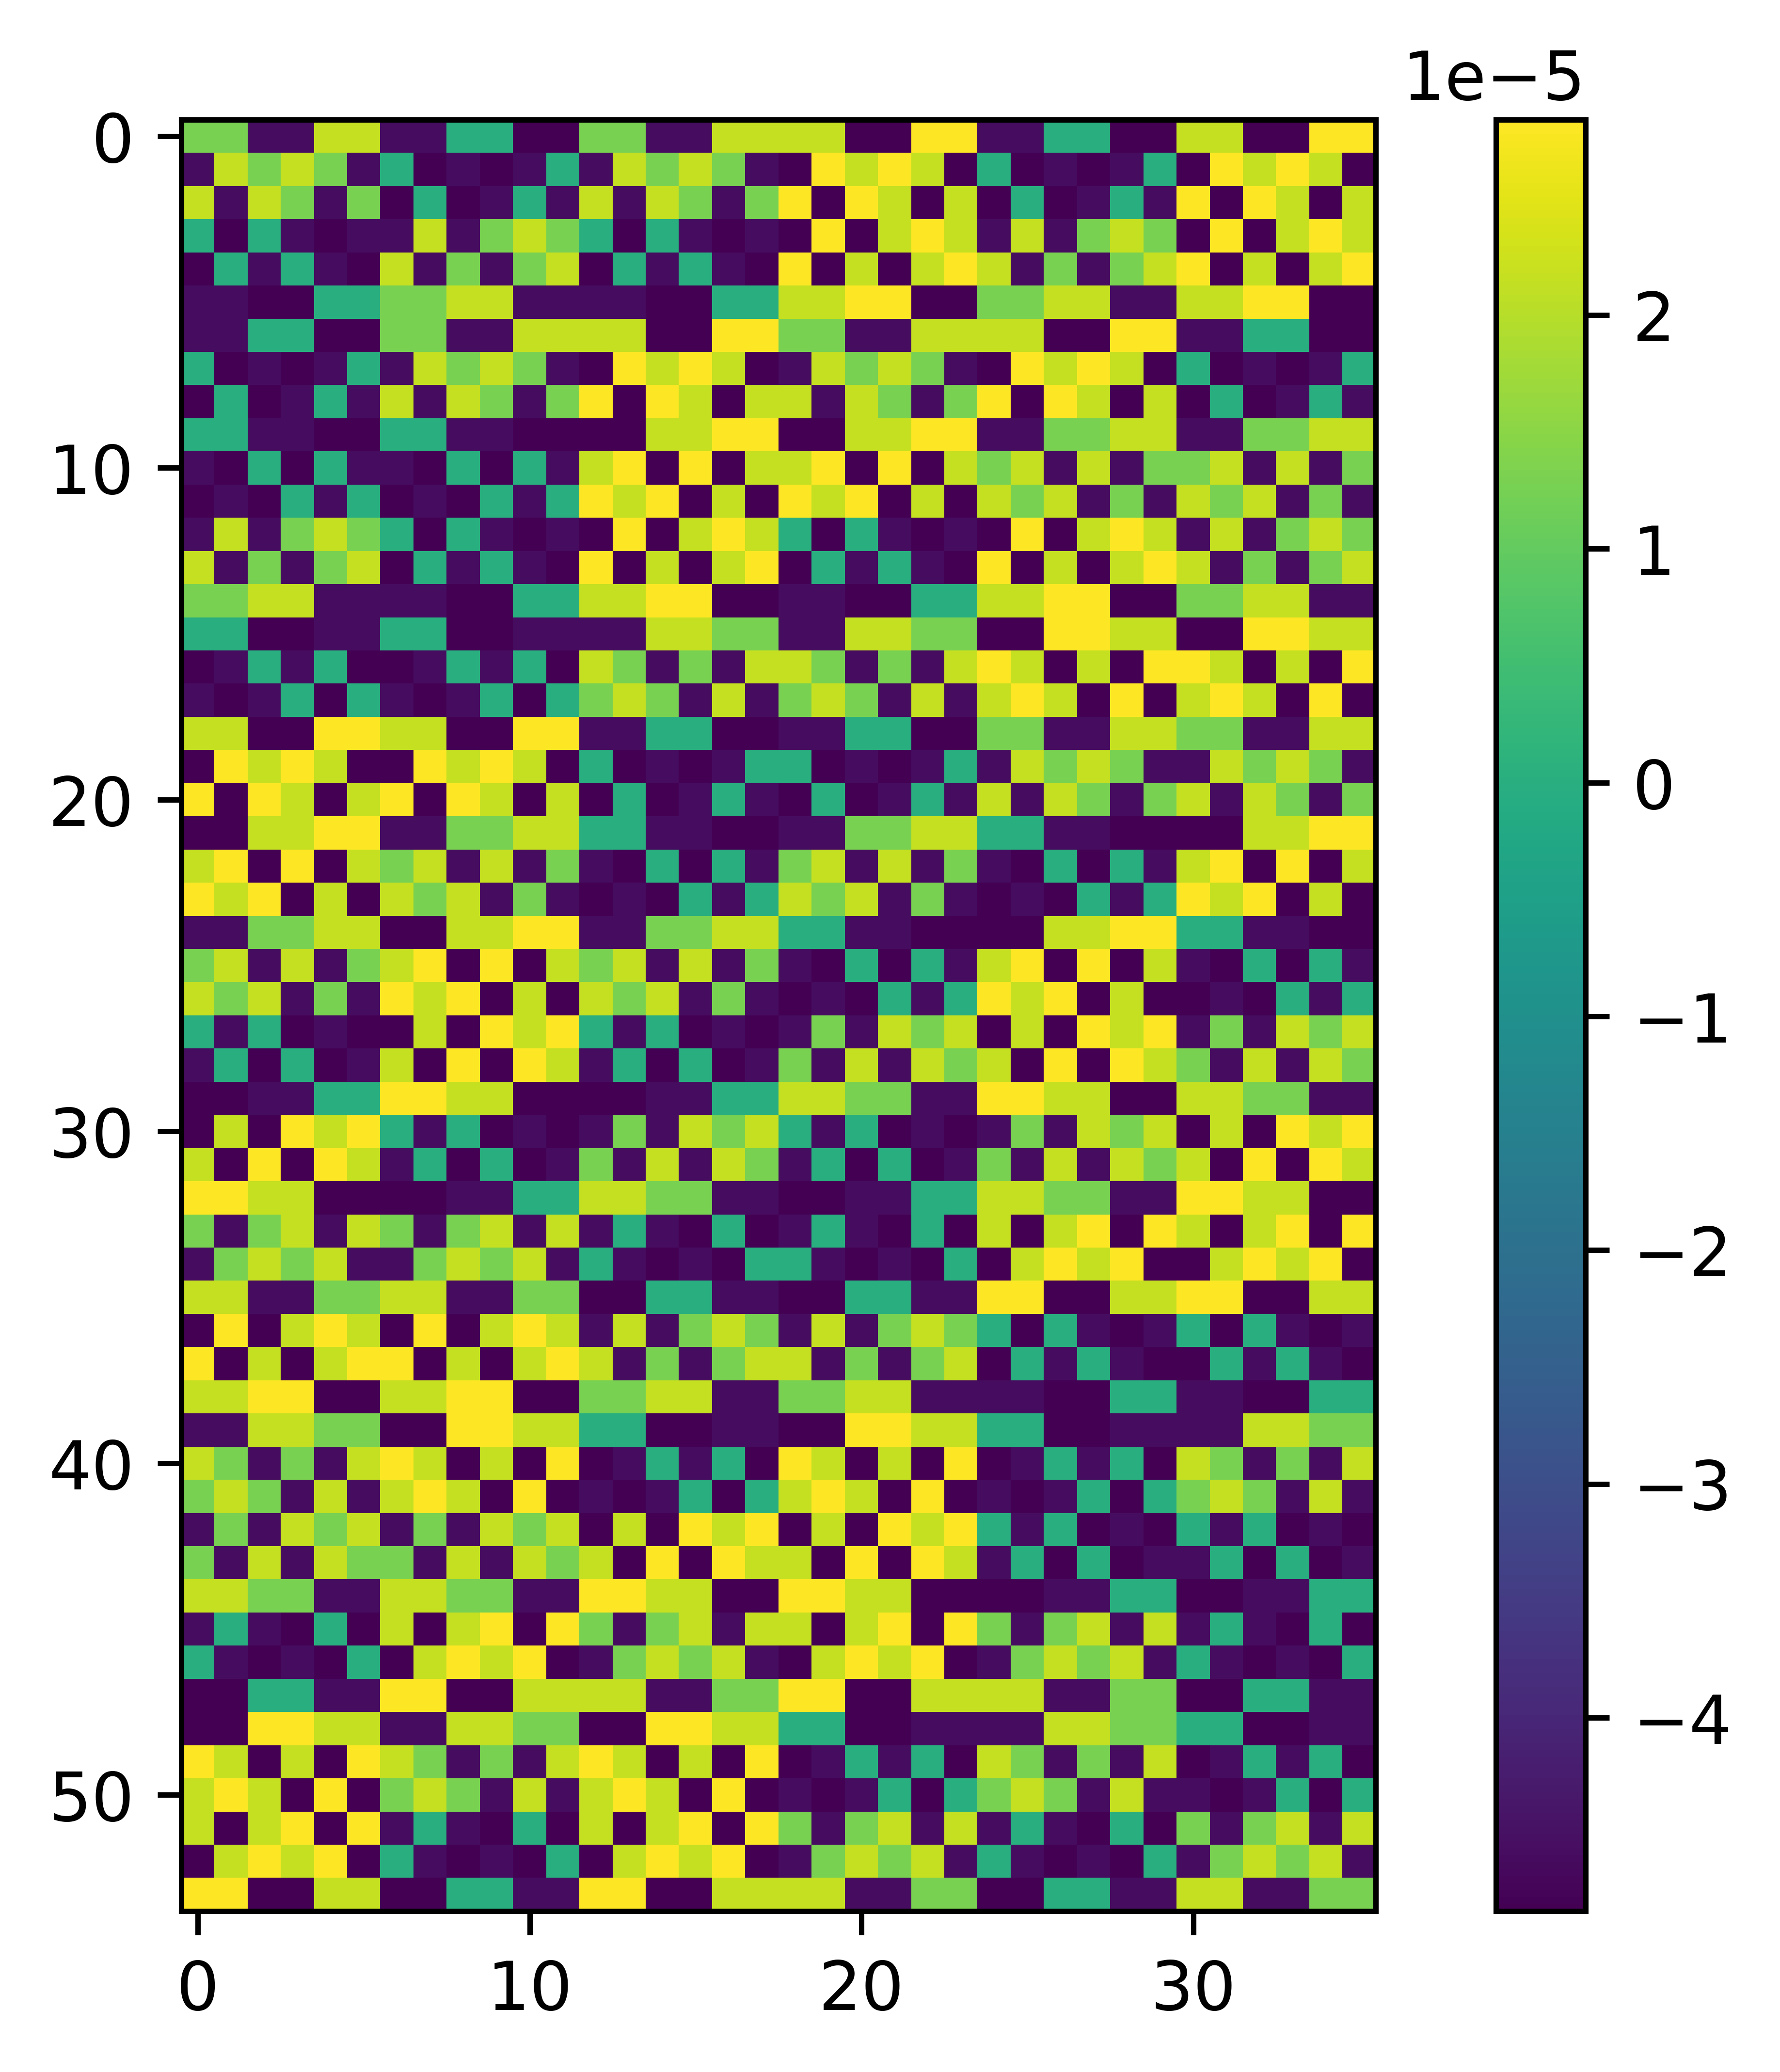

In [68]:
plt.imshow(c*reduced_mat - special_ed_adv.matrix)
plt.colorbar()
plt.savefig()
